In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2022-11-28 22:03:30.098675: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=False)
df

,s0,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,...,sigH,sigHDir,stress,ustar,yday,yyyy,lat,lon,inc,az
2016-10-15 11:11:00.040358,-10.716533,-0.141843,0.139905,314.524998,2450.950064,1027.406951,1028.625000,6.160641,6.383411,65.999099,...,1.46,132.525009,0.051154,0.206083,289.465973,2016.0,40.1334,-70.7785,36.939549,280.303406
2016-10-27 11:10:59.998666,-10.428986,-0.072415,0.150943,325.590001,2453.349555,1028.932003,1030.173022,4.093492,4.328679,60.574349,...,1.15,26.921074,0.026311,0.149322,301.465972,2016.0,40.1334,-70.7785,36.939166,280.304260
2016-11-08 11:11:00.008765,-7.888538,-0.190541,0.019612,275.255000,2463.162174,1018.797927,1020.020987,5.729316,5.916348,76.340198,...,2.49,115.134997,0.138933,0.335928,313.465972,2016.0,40.1334,-70.7785,36.939430,280.305267
2016-11-20 11:11:00.032040,-6.675949,0.090434,-0.014317,325.024998,2465.325948,996.900548,998.101501,5.499024,5.736256,77.243100,...,3.06,263.024120,0.704025,0.760369,325.465973,2016.0,40.1334,-70.7785,36.944334,280.304962
2016-12-02 11:11:00.018491,-8.313871,-0.131429,0.007746,290.899998,2466.723969,1008.815425,1010.032495,4.674340,4.900052,68.000799,...,2.73,275.216734,0.263718,0.463015,337.465972,2016.0,40.1334,-70.7785,36.934665,280.304535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-17 22:11:59.972545,-10.961686,-0.163630,-0.079919,245.750001,2488.148243,1018.647439,1019.905991,2.457910,2.588437,55.943499,...,1.39,289.399994,0.127772,0.316749,441.925000,2019.0,40.1334,-70.7785,31.669628,439.104340
2019-03-22 11:12:00.025207,-9.263327,-0.163630,-0.079919,334.450005,2487.481136,988.859930,990.059491,6.373908,6.305663,96.755999,...,2.77,159.800003,0.077808,0.252194,446.466667,2019.0,40.1334,-70.7785,36.941170,280.305023
2019-03-22 23:11:59.987549,-5.838643,-0.163630,-0.079919,310.754999,2488.029252,992.263616,993.473001,4.684813,4.736986,78.480299,...,4.36,239.100006,0.378212,0.553690,446.966667,2019.0,40.1334,-70.7785,42.401340,440.393127
2019-03-29 22:11:59.992672,-11.901174,-0.163630,-0.079919,320.205003,2486.554899,1019.038234,1020.272504,6.125720,6.060065,92.756199,...,1.26,133.199997,0.023995,0.138103,453.925000,2019.0,40.1334,-70.7785,31.674418,439.104279


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,s0,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,...,sigH,sigHDir,stress,ustar,yday,yyyy,lat,lon,inc,az
2016-10-15 11:11:00.040358,-10.716533,-0.141843,0.139905,314.524998,2450.950064,1027.406951,1028.625000,6.160641,6.383411,65.999099,...,1.46,132.525009,0.051154,0.206083,289.465973,2016.0,40.1334,-70.7785,36.939549,280.303406
2016-10-27 11:10:59.998666,-10.428986,-0.072415,0.150943,325.590001,2453.349555,1028.932003,1030.173022,4.093492,4.328679,60.574349,...,1.15,26.921074,0.026311,0.149322,301.465972,2016.0,40.1334,-70.7785,36.939166,280.304260
2016-11-08 11:11:00.008765,-7.888538,-0.190541,0.019612,275.255000,2463.162174,1018.797927,1020.020987,5.729316,5.916348,76.340198,...,2.49,115.134997,0.138933,0.335928,313.465972,2016.0,40.1334,-70.7785,36.939430,280.305267
2016-11-20 11:11:00.032040,-6.675949,0.090434,-0.014317,325.024998,2465.325948,996.900548,998.101501,5.499024,5.736256,77.243100,...,3.06,263.024120,0.704025,0.760369,325.465973,2016.0,40.1334,-70.7785,36.944334,280.304962
2016-12-02 11:11:00.018491,-8.313871,-0.131429,0.007746,290.899998,2466.723969,1008.815425,1010.032495,4.674340,4.900052,68.000799,...,2.73,275.216734,0.263718,0.463015,337.465972,2016.0,40.1334,-70.7785,36.934665,280.304535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-17 22:11:59.972545,-10.961686,-0.163630,-0.079919,245.750001,2488.148243,1018.647439,1019.905991,2.457910,2.588437,55.943499,...,1.39,289.399994,0.127772,0.316749,441.925000,2019.0,40.1334,-70.7785,31.669628,439.104340
2019-03-22 11:12:00.025207,-9.263327,-0.163630,-0.079919,334.450005,2487.481136,988.859930,990.059491,6.373908,6.305663,96.755999,...,2.77,159.800003,0.077808,0.252194,446.466667,2019.0,40.1334,-70.7785,36.941170,280.305023
2019-03-22 23:11:59.987549,-5.838643,-0.163630,-0.079919,310.754999,2488.029252,992.263616,993.473001,4.684813,4.736986,78.480299,...,4.36,239.100006,0.378212,0.553690,446.966667,2019.0,40.1334,-70.7785,42.401340,440.393127
2019-03-29 22:11:59.992672,-11.901174,-0.163630,-0.079919,320.205003,2486.554899,1019.038234,1020.272504,6.125720,6.060065,92.756199,...,1.26,133.199997,0.023995,0.138103,453.925000,2019.0,40.1334,-70.7785,31.674418,439.104279


In [7]:
114*0.8

91.2

In [8]:
split_idx = 90

# Prepare features and labels

In [9]:
predictor_variables = ['s0', 'inc', 'az']

In [10]:
x = df[predictor_variables]
x

,s0,inc,az
2016-10-15 11:11:00.040358,-10.716533,36.939549,280.303406
2016-10-27 11:10:59.998666,-10.428986,36.939166,280.304260
2016-11-08 11:11:00.008765,-7.888538,36.939430,280.305267
2016-11-20 11:11:00.032040,-6.675949,36.944334,280.304962
2016-12-02 11:11:00.018491,-8.313871,36.934665,280.304535
...,...,...,...
2019-03-17 22:11:59.972545,-10.961686,31.669628,439.104340
2019-03-22 11:12:00.025207,-9.263327,36.941170,280.305023
2019-03-22 23:11:59.987549,-5.838643,42.401340,440.393127
2019-03-29 22:11:59.992672,-11.901174,31.674418,439.104279


In [11]:
y = df['UWr'] * df['rhoair']
y

2016-10-15 11:11:00.040358   -0.092892
2016-10-27 11:10:59.998666   -0.032191
2016-11-08 11:11:00.008765   -0.156937
2016-11-20 11:11:00.032040   -0.659123
2016-12-02 11:11:00.018491   -0.291660
                                ...   
2019-03-17 22:11:59.972545   -0.117929
2019-03-22 11:12:00.025207   -0.108348
2019-03-22 23:11:59.987549   -0.421481
2019-03-29 22:11:59.992672   -0.016227
2019-04-03 11:12:00.012533   -2.127876
Length: 114, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

In [12]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [13]:
y_train = y[:split_idx]
y_test = y[split_idx:]

# ML setup

In [14]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [15]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [16]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2022-11-28 22:03:31.422793: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-28 22:03:31.423054: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-28 22:03:31.423062: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-28 22:03:31.423080: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2022-11-28 22:03:31.423262: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

2/2 [==============================] - 1s 341ms/step - loss: 133856.0469 - mean_absolute_error: 357.3440 - val_loss: 146963.0469 - val_mean_absolute_error: 375.9148
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 130742.1719 - mean_absolute_error: 353.0137 - val_loss: 146292.6094 - val_mean_absolute_error: 375.0529
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 131445.5469 - mean_absolute_error: 354.0462 - val_loss: 145623.0312 - val_mean_absolute_error: 374.1901
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 127291.7708 - mean_absolute_error: 348.1852 - val_loss: 144956.0000 - val_mean_absolute_error: 373.3287
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 129122.1536 - mean_absolute_error: 350.8313 - val_loss: 144289.5156 - val_mean_absolute_error: 372.4660
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 131848.5260 - mean_absolute_error: 354.7337 - val_loss: 143

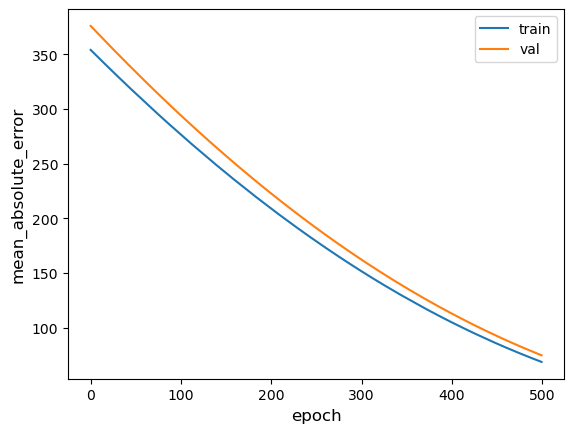

1/1 [==============================] - 0s 11ms/step - loss: 6112.3735 - mean_absolute_error: 74.5829
Test accuracy 74.58291625976562
Test loss 6112.37353515625


In [17]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [18]:
y_test_pred = multi_dense_model.predict(x_test)

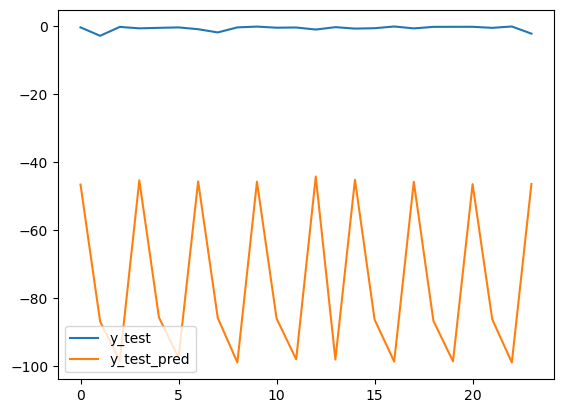

In [19]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [20]:
rmse(y_test.values, y_test_pred)

78.14190003883928

# Other experiments

In [21]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [22]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [23]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 0s 107ms/step - loss: 0.2757 - mean_absolute_error: 0.2734 - val_loss: 0.1639 - val_mean_absolute_error: 0.2213
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 0.3179 - mean_absolute_error: 0.2907 - val_loss: 0.1605 - val_mean_absolute_error: 0.2154
Epoch 3/500
2/2 [==============================] - 0s 25ms/step - loss: 0.2171 - mean_absolute_error: 0.2378 - val_loss: 0.1573 - val_mean_absolute_error: 0.2103
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 0.2667 - mean_absolute_error: 0.2649 - val_loss: 0.1542 - val_mean_absolute_error: 0.2062
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 0.2527 - mean_absolute_error: 0.2411 - val_loss: 0.1512 - val_mean_absolute_error: 0.2032
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 0.2892 - mean_absolute_error: 0.2618 - val_loss: 0.1483 - val_mean_absolute_error: 0.2006
Epoch 7/500
2/2 [==========

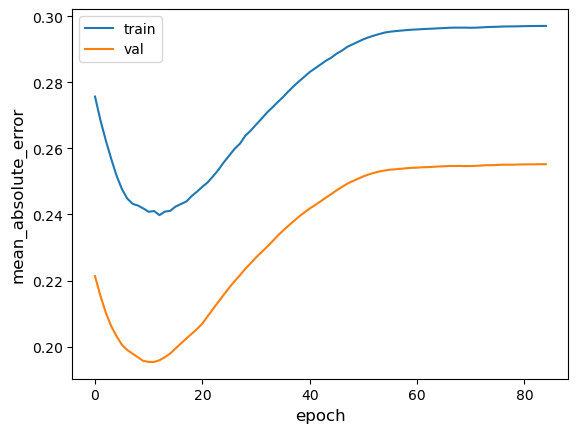

1/1 [==============================] - 0s 11ms/step - loss: 0.5539 - mean_absolute_error: 0.4213
Test accuracy 0.421294242143631
Test loss 0.553889811038971


In [24]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [25]:
y_test_pred = multi_dense_model.predict(x_test)

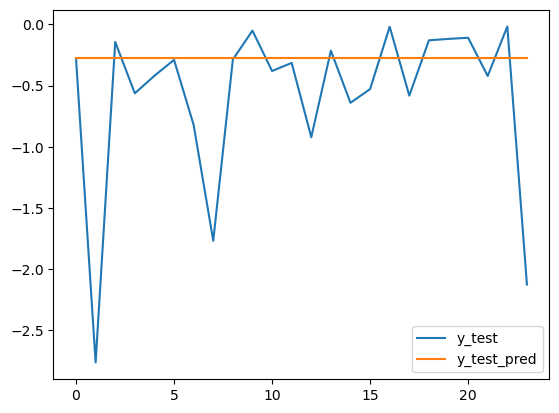

In [26]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [27]:
rmse(y_test.values, y_test_pred)

0.7442377149884617

In [28]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [29]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [30]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 0s 102ms/step - loss: 0.6958 - mean_absolute_error: 0.5837 - val_loss: 9.0219 - val_mean_absolute_error: 2.7129
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 0.5431 - mean_absolute_error: 0.4988 - val_loss: 12.3850 - val_mean_absolute_error: 3.3148
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6099 - mean_absolute_error: 0.5546 - val_loss: 11.4043 - val_mean_absolute_error: 3.2063
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6284 - mean_absolute_error: 0.5758 - val_loss: 9.7269 - val_mean_absolute_error: 2.9650
Epoch 5/500
2/2 [==============================] - 0s 19ms/step - loss: 0.6577 - mean_absolute_error: 0.5792 - val_loss: 8.4236 - val_mean_absolute_error: 2.7603
Epoch 6/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6013 - mean_absolute_error: 0.5703 - val_loss: 7.3701 - val_mean_absolute_error: 2.5810
Epoch 7/500
2/2 [========

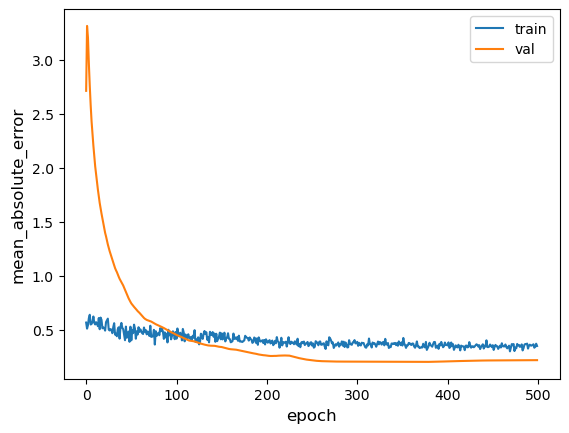

1/1 [==============================] - 0s 13ms/step - loss: 0.6274 - mean_absolute_error: 0.4620
Test accuracy 0.46195486187934875
Test loss 0.627399742603302


In [31]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [32]:
y_test_pred = multi_dense_model.predict(x_test)

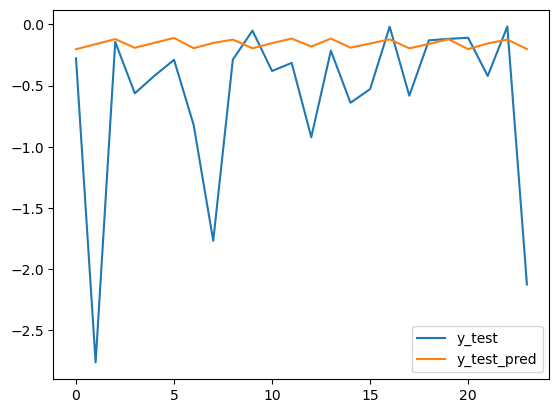

In [33]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [34]:
rmse(y_test.values, y_test_pred)

0.8002568820694388

In [35]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [36]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [37]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 0s 102ms/step - loss: 0.2632 - mean_absolute_error: 0.2600 - val_loss: 0.1908 - val_mean_absolute_error: 0.3641
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 0.2161 - mean_absolute_error: 0.2385 - val_loss: 0.1373 - val_mean_absolute_error: 0.2793
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 0.3068 - mean_absolute_error: 0.2815 - val_loss: 0.1258 - val_mean_absolute_error: 0.2418
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.2985 - mean_absolute_error: 0.2657 - val_loss: 0.1254 - val_mean_absolute_error: 0.2217
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 0.3169 - mean_absolute_error: 0.2836 - val_loss: 0.1280 - val_mean_absolute_error: 0.2125
Epoch 6/500
2/2 [==============================] - 0s 19ms/step - loss: 0.2635 - mean_absolute_error: 0.2595 - val_loss: 0.1303 - val_mean_absolute_error: 0.2082
Epoch 7/500
2/2 [==========

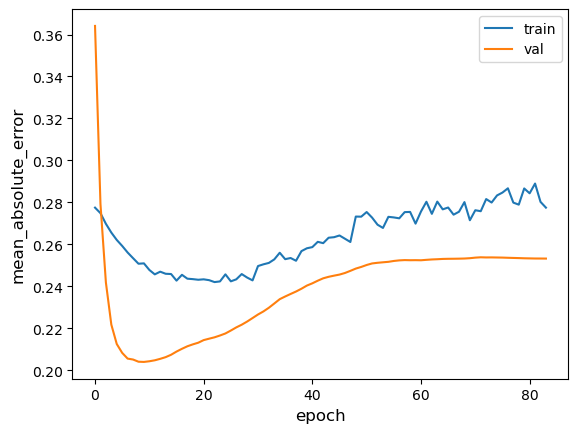

1/1 [==============================] - 0s 13ms/step - loss: 0.5632 - mean_absolute_error: 0.4279
Test accuracy 0.42786547541618347
Test loss 0.5632432699203491


In [38]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [39]:
y_test_pred = multi_dense_model.predict(x_test)

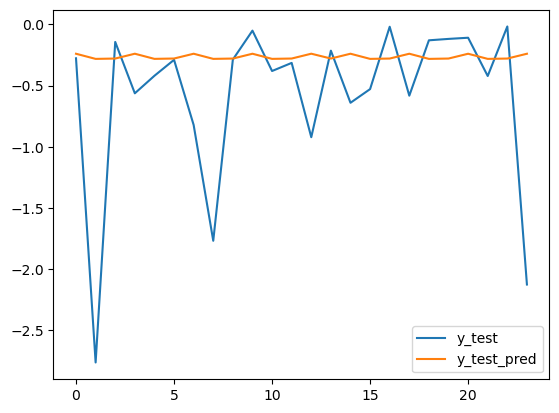

In [40]:
plt.plot(y_test.values, label='y_test')
plt.plot(y_test_pred, label='y_test_pred')
plt.legend()

In [41]:
rmse(y_test.values, y_test_pred)

0.7489439449342685

# predictors to use for the ML and validation: extraction


ml_predictors = [
    # # electromagnetic fluxes
    "IR",
    "Solar",
    # #---------- 
    # # specific humidities
    "Q10",
    "SSQ",
    "Qair",
    # #---------- 
    # # relative humidities
    "RH",
    # "RH10",
    # #---------- 
    # # air characteristics
    # "rhoair",
    # "P10",
    # "Pair",
    # #---------- 
    # # temperatures
    "SST",
    "T10",
    # "Tair",
    "Tsea",
    # "Tseasonic",
    # "Tsonic",
    # #---------- 
    # # waves
    # "Tm",
    "Tp",
    # "cp",
    "sigH",
    "sigHDir",
    # #---------- 
    # # wind characteristics
    # "U10e",
    "U10r",
    # "Ue",
    # "Ur",
    # "Wdir",
    "Wdirr",
    # #---------- 
    # # Obukhov scaling
    "moL",
    # "moLcbrt",
    # "moLclipped",
    # "moLinv",
    # #---------- 
    # # bulk fluxes
    "lhf",
    "shf",
    # # ----------
    # # composite variables
    # 'windspeed_over_wavecp',
    # 'mismatch_winddir_wavedir',
    # 'difference_specific_humidity',
    # # ----------
    # # others
    # "WTr",
    ## "Lv",
    # "stress",
]
